### About the Project:

In this project, I will be performing an unsupervised clustering of data on the user's records from the given database.

Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. Here, I will divide customers into segments of the categories given to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

#### • Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

In [2]:
# Loading the dataset

df=pd.read_csv('Data.csv')
df.shape

(66460, 6)

In [3]:
df.head()

,created,orderNum,subOrderNum,userId,subTotal(INR),Category
0,25/02/22 00:00,6677560,6677560_1,7333,900,Women Bags and Clutches
1,25/02/22 00:00,3136297,3136297_1,6375,530,Kurtis and Kurtas
2,25/02/22 00:01,5532135,5532135_1,19003,865,Suits
3,25/02/22 00:01,5532135,5532135_2,19003,865,Suits
4,25/02/22 00:01,5532135,5532135_3,19003,865,Suits


In [4]:
df.dtypes

created          object
orderNum          int64
subOrderNum      object
userId            int64
subTotal(INR)     int64
Category         object
dtype: object

Now, changing the data type of 'created' and 'Category' for better undertanding of data.

In [5]:
df['created'] = pd.to_datetime(df['created'])
df.dtypes

created          datetime64[ns]
orderNum                  int64
subOrderNum              object
userId                    int64
subTotal(INR)             int64
Category                 object
dtype: object

In [6]:
df["Category"]

0        Women Bags and Clutches
1              Kurtis and Kurtas
2                          Suits
3                          Suits
4                          Suits
                  ...           
66455    Women Bags and Clutches
66456    Women Bags and Clutches
66457                     Sarees
66458            Women Nightwear
66459       Pendants and Lockets
Name: Category, Length: 66460, dtype: object

In [7]:
df['Category'].unique()

array(['Women Bags and Clutches', 'Kurtis and Kurtas', 'Suits', 'Palazzo',
       'Ponchos', 'Floor Coverings', 'Anklets', 'Men Ethnic Jackets',
       'Girls Shorts', 'Shawls and Stoles', 'Anarkalis',
       'Booties & Mittens', 'Dupattas', 'Girls Sweatshirts', 'Lehengas',
       'Pendants and Lockets', 'Others', 'Women Slippers and Flip Flops',
       'Photo Frame and Albums', 'Crockery', 'Boxes and Utilities',
       'Kids Hair Accessories', 'Women Artificial Jewellery',
       'Women Track Pants', 'Housekeeping and Laundry', 'Women Nightwear',
       'Frocks', 'Sarees', 'Aprons & Mittens', 'Kids Caps and Hats',
       'Girls Nightwear', 'Women Shorts', 'Salwars and Churidars',
       'Nail Art', 'Women Trousers and Pants', 'Women Capris',
       'Girls Skirts', 'Blouses', 'Girls Dresses', 'Boys Nightwear',
       'Dress Material', 'Makeup & Beauty Products', 'Men Shorts',
       'Women Intimates', 'Wall Decor', 'Bed Linen',
       'Women Jewellery Sets', 'Bath Linen', 'Girls Indian

In [8]:
category_array = df['Category'].unique()

category_dict = {}

for i, val in enumerate(category_array):
    category_dict[val] = i
    
category_dict

{'Women Bags and Clutches': 0,
 'Kurtis and Kurtas': 1,
 'Suits': 2,
 'Palazzo': 3,
 'Ponchos': 4,
 'Floor Coverings': 5,
 'Anklets': 6,
 'Men Ethnic Jackets': 7,
 'Girls Shorts': 8,
 'Shawls and Stoles': 9,
 'Anarkalis': 10,
 'Booties & Mittens': 11,
 'Dupattas': 12,
 'Girls Sweatshirts': 13,
 'Lehengas': 14,
 'Pendants and Lockets': 15,
 'Others': 16,
 'Women Slippers and Flip Flops': 17,
 'Photo Frame and Albums': 18,
 'Crockery': 19,
 'Boxes and Utilities': 20,
 'Kids Hair Accessories': 21,
 'Women Artificial Jewellery': 22,
 'Women Track Pants': 23,
 'Housekeeping and Laundry': 24,
 'Women Nightwear': 25,
 'Frocks': 26,
 'Sarees': 27,
 'Aprons & Mittens': 28,
 'Kids Caps and Hats': 29,
 'Girls Nightwear': 30,
 'Women Shorts': 31,
 'Salwars and Churidars': 32,
 'Nail Art': 33,
 'Women Trousers and Pants': 34,
 'Women Capris': 35,
 'Girls Skirts': 36,
 'Blouses': 37,
 'Girls Dresses': 38,
 'Boys Nightwear': 39,
 'Dress Material': 40,
 'Makeup & Beauty Products': 41,
 'Men Shorts': 4

In [9]:
df_mapped = df.copy()
df_mapped['Category'] = df_mapped['Category'].map({
    'Women Bags and Clutches': 0,
    'Kurtis and Kurtas': 1,
    'Suits': 2,
    'Palazzo': 3,
    'Ponchos': 4,
    'Floor Coverings': 5,
    'Anklets': 6,
    'Men Ethnic Jackets': 7,
    'Girls Shorts': 8,
    'Shawls and Stoles': 9,
    'Anarkalis': 10,
    'Booties & Mittens': 11,
    'Dupattas': 12,
    'Girls Sweatshirts': 13,
    'Lehengas': 14,
    'Pendants and Lockets': 15,
    'Others': 16,
    'Women Slippers and Flip Flops': 17,
    'Photo Frame and Albums': 18,
    'Crockery': 19,
    'Boxes and Utilities': 20,
    'Kids Hair Accessories': 21,
    'Women Artificial Jewellery': 22,
    'Women Track Pants': 23,
    'Housekeeping and Laundry': 24,
    'Women Nightwear': 25,
    'Frocks': 26,
    'Sarees': 27,
    'Aprons & Mittens': 28,
    'Kids Caps and Hats': 29,
    'Girls Nightwear': 30,
    'Women Shorts': 31,
    'Salwars and Churidars': 32,
    'Nail Art': 33,
    'Women Trousers and Pants': 34,
    'Women Capris': 35,
    'Girls Skirts': 36,
    'Blouses': 37,
    'Girls Dresses': 38,
    'Boys Nightwear': 39,
    'Dress Material': 40,
    'Makeup & Beauty Products': 41,
    'Men Shorts': 42,
    'Women Intimates': 43,
    'Wall Decor': 44,
    'Bed Linen': 45,
    'Women Jewellery Sets': 46,
    'Bath Linen': 47,
    'Girls Indianwear': 48,
    'Women Shirts': 49,
    'Boys Sets': 50,
    'Decorative Lighting': 51,
    'Men Track Pants': 52,
    'Other Home Decor': 53,
    'Bangles and Bracelets': 54,
    'Boys Capris and Three Fourths': 55,
    'Other Home Furnishing': 56,
    'Kids Toys and Games': 57,
    'Kitchen Appliances': 58,
    'General Utility Furniture': 59,
    'Leggings, Jeggings and Tights': 60,
    'Men Underwear': 61,
    'Girls Sets': 62,
    'Women Tops and Tunics': 63,
    'Girls Leggings and Jeggings': 64,
    'Earrings': 65,
    'Women Socks': 66,
    'Necklaces and Chains': 67,
    'Boys T Shirts': 68,
    'Kids Bags and Purses': 69,
    'Cushions, Pillows and Covers': 70,
    'Comforters & Quilts': 71,
    'Men T Shirts': 72,
    'Travel Bags and Accessories': 73,
    'Organizers': 74,
    'Kitchen and Dining Linen': 75,
    'Kitchen Storage': 76,
    'Rakhi': 77,
    'Cookware': 78,
    'Women Precious Jewellery': 79,
    'Women Rings': 80,
    'Women Jeans': 81,
    'Salwar Kameez': 82,
    'Bottles & Jugs': 83,
    'Gown': 84,
    'Men Undershirts': 85,
    'Mangalasutras': 86,
    'Boys Shirts': 87,
    'Women Brooches': 88,
    'Girls T Shirts': 89,
    'Indian Jackets and Shrugs': 90,
    'Men Kurtas': 91,
    'Men Shirts': 92,
    'Table Decor': 93,
    'Storage Furniture': 94,
    'Backpack and Accessories': 95,
    'Women Wedges': 96,
    'Serveware': 97,
    'Women Scarves and Wraps': 98,
    'Home Appliances': 99,
    'Festive Decor': 100,
    'Other Accessories': 101,
    'Men Jackets and Coats': 102,
    'Seating Furniture': 103,
    'Western Dresses and Jumpsuits': 104,
    'Boys Casual Shoes': 105,
    'Men Jeans': 106,
    'Boys Shorts': 107,
    'Mobile and Tablet Accessories': 108,
    'Candles and Fragrances': 109,
    'Home & Lifestyle': 110,
    'Men Kurta Pyjamas': 111,
    'Girls Capris and Three Fourths': 112,
    'Men Casual Shoes': 113,
    'Clocks': 114})
df_mapped

,created,orderNum,subOrderNum,userId,subTotal(INR),Category
0,2022-02-25 00:00:00,6677560,6677560_1,7333,900,0
1,2022-02-25 00:00:00,3136297,3136297_1,6375,530,1
2,2022-02-25 00:01:00,5532135,5532135_1,19003,865,2
3,2022-02-25 00:01:00,5532135,5532135_2,19003,865,2
4,2022-02-25 00:01:00,5532135,5532135_3,19003,865,2
...,...,...,...,...,...,...
66455,2022-05-27 23:56:00,2607221,2607221_2,61,2085,0
66456,2022-05-27 23:56:00,2607221,2607221_3,61,2085,0
66457,2022-05-27 23:56:00,8150994,8150994_1,3922,664,27
66458,2022-05-27 23:57:00,8401096,8401096_1,5819,315,25


In [11]:
df_mapped['Category'].astype(int)

0         0
1         1
2         2
3         2
4         2
         ..
66455     0
66456     0
66457    27
66458    25
66459    15
Name: Category, Length: 66460, dtype: int32

In [12]:
df_mapped.dtypes

created          datetime64[ns]
orderNum                  int64
subOrderNum              object
userId                    int64
subTotal(INR)             int64
Category                  int64
dtype: object

##### Now, getting information on features.

In [13]:
# Information on features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66460 entries, 0 to 66459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   created        66460 non-null  datetime64[ns]
 1   orderNum       66460 non-null  int64         
 2   subOrderNum    66460 non-null  object        
 3   userId         66460 non-null  int64         
 4   subTotal(INR)  66460 non-null  int64         
 5   Category       66460 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.0+ MB


#### Performing Descriptive Statistics:

A descriptive statistic will give us a summary statistic that will quantitatively describe or summarize features from the collection of information, as descriptive statistics is the process of using and analysing those statistics.

In [14]:
df.describe()

,orderNum,userId,subTotal(INR)
count,6.646000e+04,66460.000000,66460.000000
mean,5.515291e+06,17946.102302,777.640310
std,2.599070e+06,12464.178103,984.596787
min,1.000007e+06,-12834.000000,0.000000
25%,3.268407e+06,8212.000000,328.000000
50%,5.511730e+06,17058.000000,524.000000
75%,7.774449e+06,25628.250000,882.000000
max,9.999733e+06,53886.000000,52450.000000


In [15]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,orderNum,userId,subTotal(INR)
count,66460.00000,66460.00000,66460.00000
mean,5515290.82797,17946.10230,777.64031
std,2599069.76599,12464.17810,984.59679
min,1000007.00000,-12834.00000,0.00000
25%,3268407.25000,8212.00000,328.00000
50%,5511730.00000,17058.00000,524.00000
75%,7774449.00000,25628.25000,882.00000
max,9999733.00000,53886.00000,52450.00000


From the above data, we can observe some values in userId shown with a negative sign, which might mean that the particular order was cancelled later by the user.

###### We first used df.describe() function of pandas which is great but a little basic for serious exploratory data analysis. We will now use pandas_profiling which would extend the pandas DataFrame with df.profile_report() for quick data analysis.

In [18]:
profile = ProfileReport(df_mapped, title = "Market Segmentation Report")

In [19]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the above detailed analysis, if we see the analysis of the Categories column, we see that the maximum purchases have been made in the following categories:

1. Others (28.2%)
2. Suites (23.2%)
3. Palazzo (17.8%)

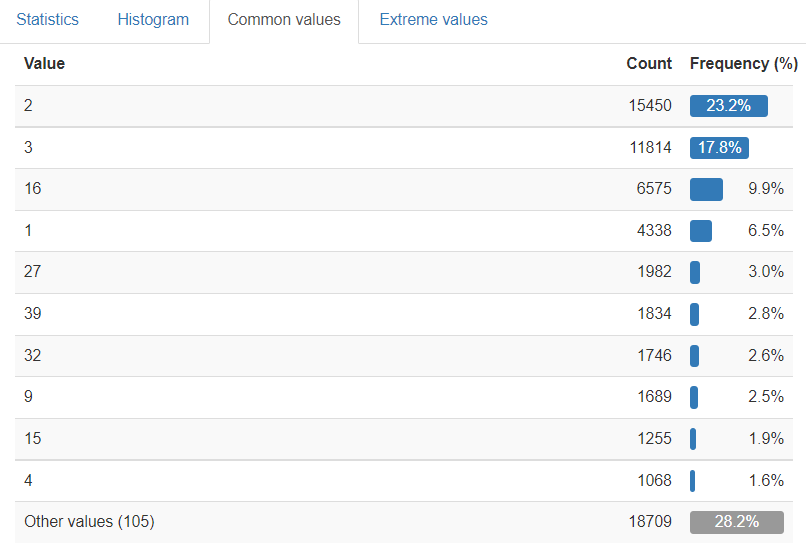

To get detailed insights on this, we will move ahead with the clustering of the data using K-means to arrive at a much stable conclusion.

##### Before moving ahead with the process of clustering, let us understand a bit more in terms of highest and lowest amount spent on various categories by the users to understanding the spending pattern.

In [22]:
# validate the low and high price(checking if there is any outliers)

print("Lowest Amount Spent :",df_mapped["subTotal(INR)"].min())
print("highest Amount Spent :",df_mapped["subTotal(INR)"].max())

Lowest Amount Spent : 0
highest Amount Spent : 52450


Here, INR 0 is the lowest amount being spent on purchase that there have been few order which got cancelled later and the highest amount being spent is INR 52,450.

##### Now, segregating the data in hours, days, weeks, months and years to know the flow of orders.

In [25]:
# Date related features
# convert column to datatime

df_mapped['created'] = pd.to_datetime(df_mapped['created'])
# extract year, month, hour, day, hour, quarter, week, weekday  
df_mapped['Order Year'] = df_mapped['created'].dt.year
df_mapped['Order Month'] = df_mapped['created'].dt.month
df_mapped["Order Day"] = df_mapped['created'].dt.day
df_mapped['Order Hour'] = df_mapped['created'].dt.hour
df_mapped["Order Quarter"] = df_mapped['created'].dt.quarter
df_mapped["Order Week"] = df_mapped['created'].dt.isocalendar().week
df_mapped["Order Weekday"] = df_mapped['created'].dt.weekday

In [26]:
df_mapped.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,orderNum,userId,subTotal(INR),Category,Order Year,Order Month,Order Day,Order Hour,Order Quarter,Order Week,Order Weekday
count,66460.00000,66460.00000,66460.00000,66460.00000,66460.00000,66460.00000,66460.00000,66460.00000,66460.00000,66460.00000,66460.00000
mean,5515290.82797,17946.10230,777.64031,15.79707,2022.00000,4.87495,15.12462,15.11569,1.96321,18.97969,2.91318
std,2599069.76599,12464.17810,984.59679,20.43589,0.00000,2.50894,9.34895,5.29544,0.86375,10.39842,2.00626
min,1000007.00000,-12834.00000,0.00000,0.00000,2022.00000,1.00000,3.00000,0.00000,1.00000,1.00000,0.00000
25%,3268407.25000,8212.00000,328.00000,2.00000,2022.00000,3.00000,5.00000,12.00000,1.00000,12.00000,1.00000
50%,5511730.00000,17058.00000,524.00000,4.00000,2022.00000,4.00000,16.00000,15.00000,2.00000,17.00000,3.00000
75%,7774449.00000,25628.25000,882.00000,23.00000,2022.00000,5.00000,24.00000,19.00000,2.00000,21.00000,5.00000
max,9999733.00000,53886.00000,52450.00000,114.00000,2022.00000,12.00000,31.00000,23.00000,4.00000,49.00000,6.00000


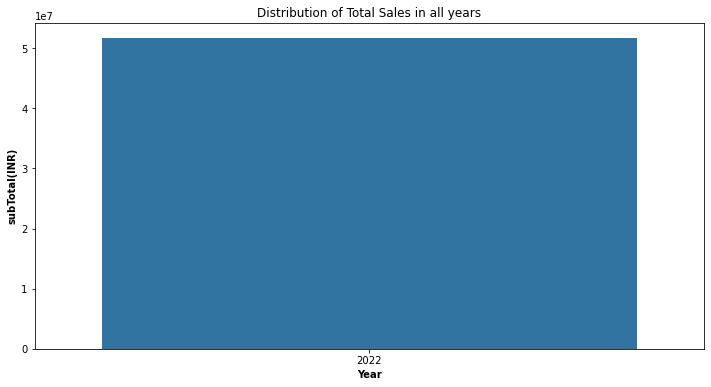

In [32]:
# Insights related to year
# the best year for sales 

best_year = df_mapped.groupby("Order Year").sum("subTotal(INR)")
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = best_year.index, y = best_year['subTotal(INR)'], data = best_year,ax=ax)
plt.title('Distribution of Total Sales in all years')
plt.xlabel('Year', weight = 'bold')
plt.ylabel('subTotal(INR)', weight = 'bold')
plt.show()

The above graph shows that the our dataset contains the data of only year 2022.

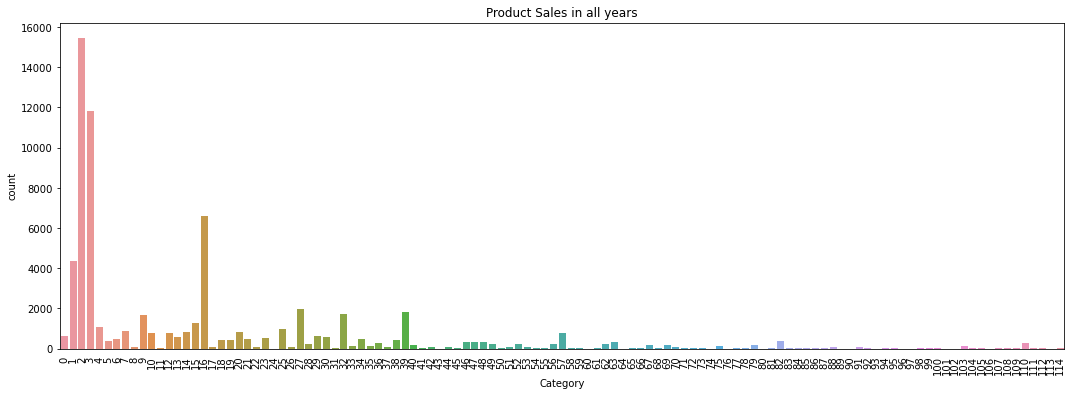

In [33]:
# Sales of all produts in the year 2022

fig, ax = plt.subplots(figsize = (18,6))
sns.countplot(x = 'Category', data = df_mapped, ax = ax)
plt.setp(ax.get_xticklabels(), rotation = 90, fontsize = 10)
ax.xaxis.set_ticks_position('none')
ax.set_title('Product Sales in all years')
plt.show()

The outperforming categories throughout the year have been Category 2 of Suites and Category 3 of Palazzo.

Text(0, 0.5, 'subTotal(INR)')

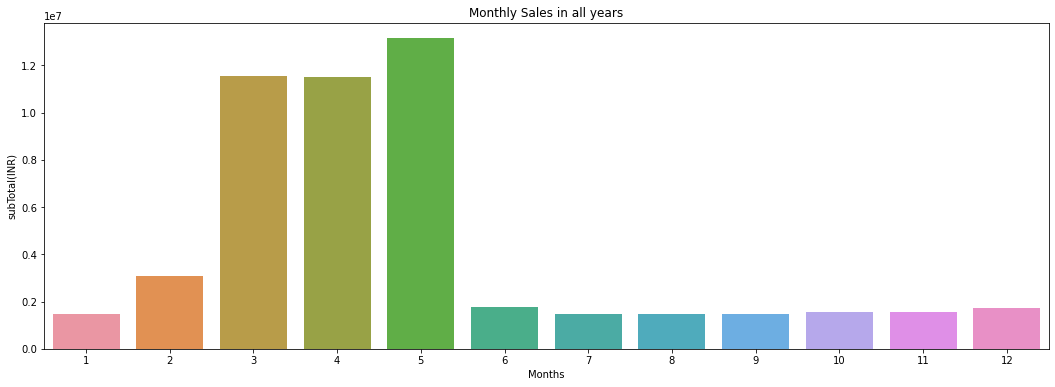

In [34]:
# Insights related to Month

plt.figure(figsize = (18,6))
monthly_sales = df_mapped.groupby(['Order Month']).sum()
sns.barplot(x = monthly_sales.index, y = monthly_sales['subTotal(INR)'], data = monthly_sales)
plt.title('Monthly Sales in all years')
plt.xlabel('Months')
plt.ylabel('subTotal(INR)')

The maximum sale has been made in the month of May, followed by almost same amount of sales in both March and April. And, the lowest sales in the month of January.

<AxesSubplot:xlabel='Order Month', ylabel='subTotal(INR)'>

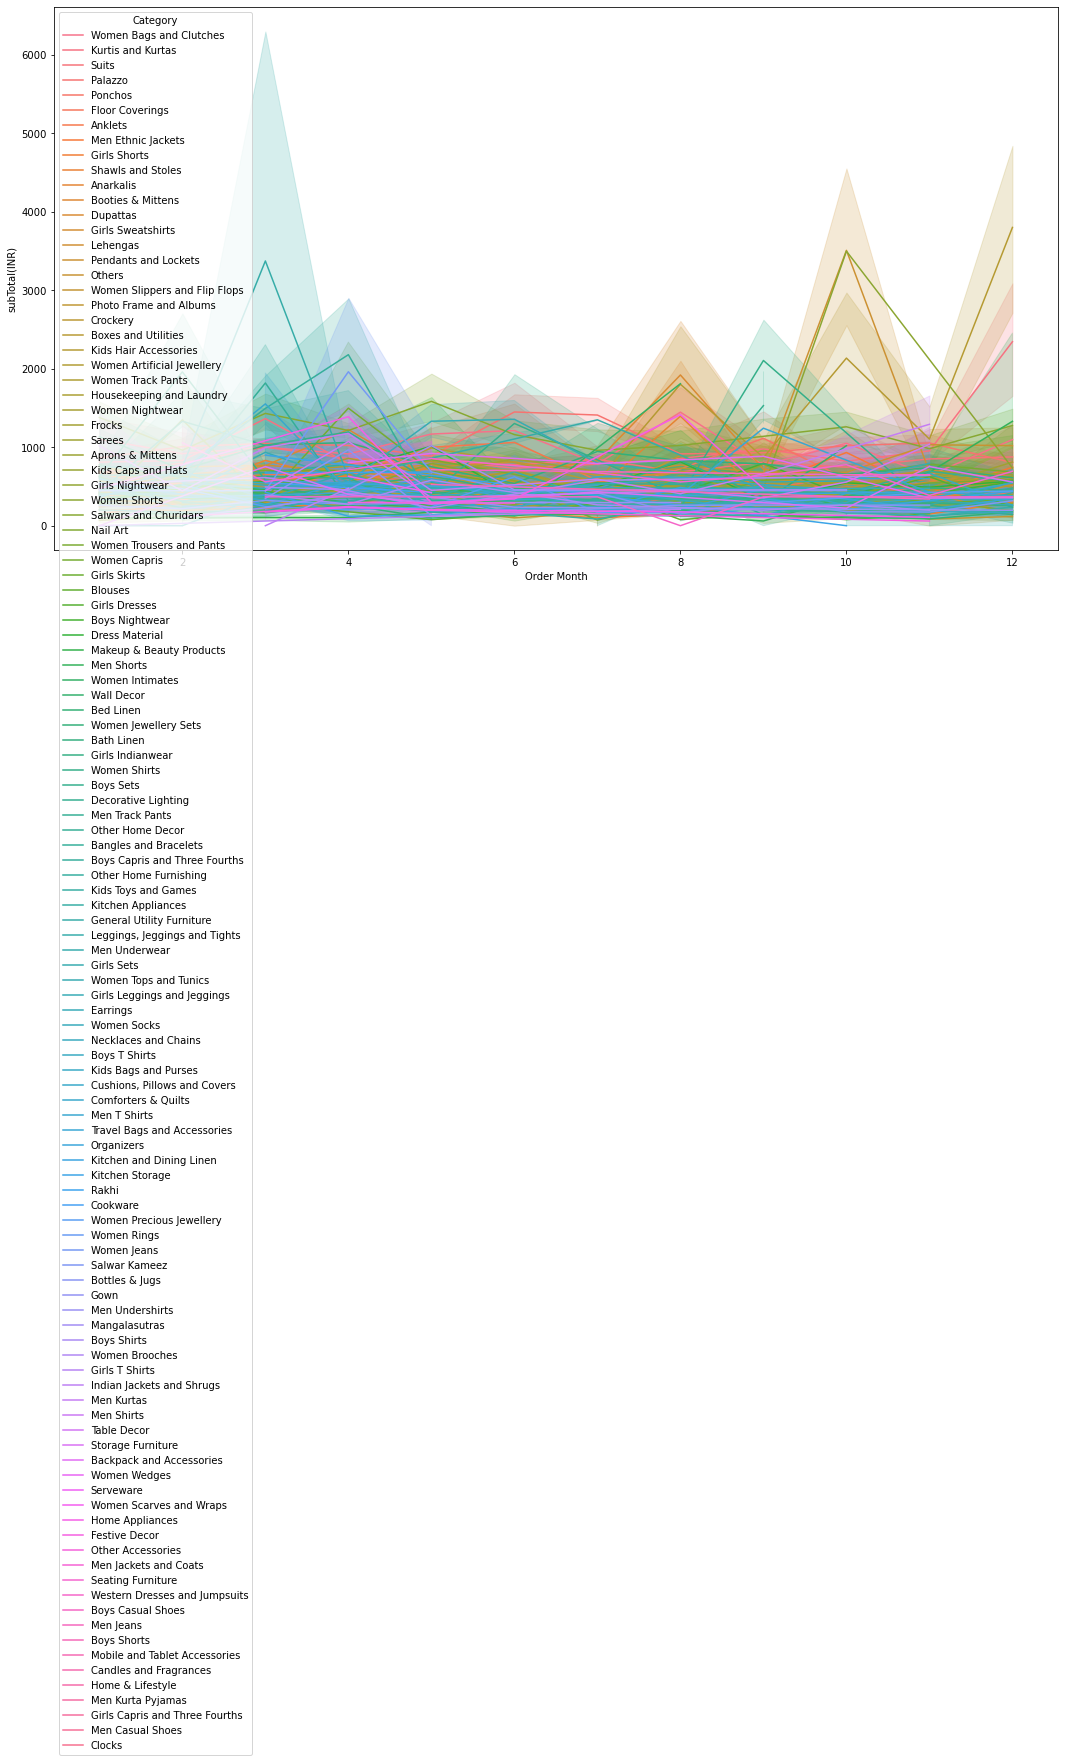

In [41]:
# sales of all product throught all months

fig, ax = plt.subplots()
fig.set_size_inches(18,10)
sns.lineplot(data = df, x='Order Month',y='subTotal(INR)', hue='Category',ax=ax)

<AxesSubplot:xlabel='Order Hour', ylabel='subTotal(INR)'>

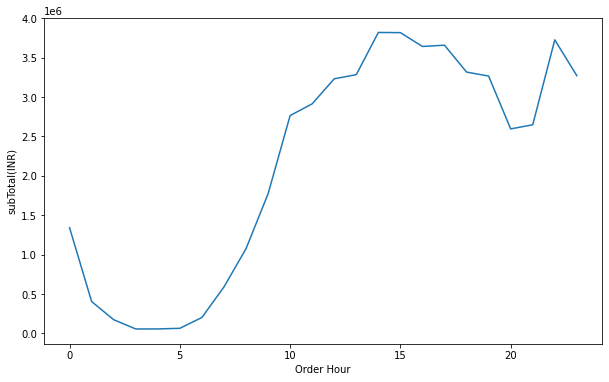

In [42]:
# Best time to sell products or recommend products to customers

plt.figure(figsize = (10, 6))
best_time = df_mapped.groupby(['Order Hour']).sum().sort_values(['Order Hour'],ascending=True)['subTotal(INR)']
sns.lineplot(data= best_time, x=best_time.index , y=best_time)

The best time when maximum orders are made is around 15:00 and 24:00 hours which users prefer to order either in the afternoon or late at night.

#### Performing Clustering:

Performing clustering using Elbow Method. This method is used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

In [46]:
df_mapped

,created,orderNum,subOrderNum,userId,subTotal(INR),Category,Order Year,Order Month,Order Day,Order Hour,Order Quarter,Order Week,Order Weekday
0,2022-02-25 00:00:00,6677560,6677560_1,7333,900,0,2022,2,25,0,1,8,4
1,2022-02-25 00:00:00,3136297,3136297_1,6375,530,1,2022,2,25,0,1,8,4
2,2022-02-25 00:01:00,5532135,5532135_1,19003,865,2,2022,2,25,0,1,8,4
3,2022-02-25 00:01:00,5532135,5532135_2,19003,865,2,2022,2,25,0,1,8,4
4,2022-02-25 00:01:00,5532135,5532135_3,19003,865,2,2022,2,25,0,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66455,2022-05-27 23:56:00,2607221,2607221_2,61,2085,0,2022,5,27,23,2,21,4
66456,2022-05-27 23:56:00,2607221,2607221_3,61,2085,0,2022,5,27,23,2,21,4
66457,2022-05-27 23:56:00,8150994,8150994_1,3922,664,27,2022,5,27,23,2,21,4
66458,2022-05-27 23:57:00,8401096,8401096_1,5819,315,25,2022,5,27,23,2,21,4


In [43]:
df_mapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66460 entries, 0 to 66459
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   created        66460 non-null  datetime64[ns]
 1   orderNum       66460 non-null  int64         
 2   subOrderNum    66460 non-null  object        
 3   userId         66460 non-null  int64         
 4   subTotal(INR)  66460 non-null  int64         
 5   Category       66460 non-null  int64         
 6   Order Year     66460 non-null  int64         
 7   Order Month    66460 non-null  int64         
 8   Order Day      66460 non-null  int64         
 9   Order Hour     66460 non-null  int64         
 10  Order Quarter  66460 non-null  int64         
 11  Order Week     66460 non-null  UInt32        
 12  Order Weekday  66460 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), int64(10), object(1)
memory usage: 6.4+ MB


In [47]:
x = df_mapped.iloc[:, [4,5]].values

# considering the subTotal(INR) and Category columns.

In [48]:
x

array([[900,   0],
       [530,   1],
       [865,   2],
       ...,
       [664,  27],
       [315,  25],
       [320,  15]], dtype=int64)

#### WCSS:

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

In [49]:
from sklearn.cluster import KMeans
wcss = []

In [50]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# k-means++ is used as an initializer to ensure smarter intialization of the centroid and improves the quality of clustering
# kmeans.inertia is used to formulate the data points into clusters

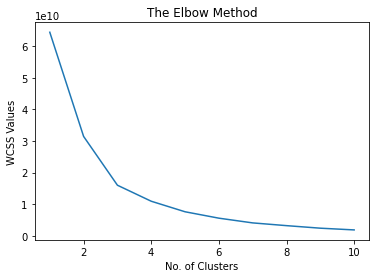

In [51]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Values')
plt.show()

The point at which the elbow shape is created is 3, our K value or an optimal number of clusters is. 

Thus, K = 3

Now, let’s train the model on the dataset with a number of clusters 3.

In [52]:
kmeansmodel = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

In [53]:
y_kmeans = kmeansmodel.fit_predict(x)

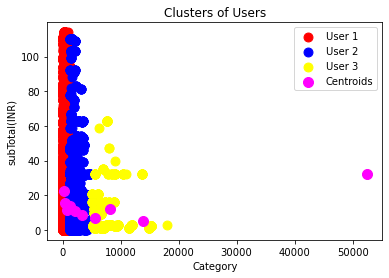

In [54]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 80, c = "red", label = 'User 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 80, c = "blue", label = 'User 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 80, c = "yellow", label = 'User 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'magenta', label = 'Centroids')
plt.title('Clusters of Users')
plt.xlabel('Category')
plt.ylabel('subTotal(INR)')
plt.legend()
plt.show()

#### Customer Segmentation Results:

- Cluster 1 results into users having a very strong preference for 'Others' category.
- Cluster 2 results into users who mostly order 'Suites'.
- Cluster 3 results into users who buy 'Suites' and 'Palazzo' mostly.

#### Market Segment Analysis:

- Behavioural - We can clearly see that the consumers are inclined towards the categories of Suites and Palazzo, considering the analysis being made for the Indian market. In Indian markets where other categories of clothes might find some restrictive occasions but the above two category fit in for any occasion.

- Demographic - As we see the top categories are Suites and Palazzo, shows that the majority consumers are females.

- Geographical - The categories which are preferred by consumers across the region is that of Suites and Palazzo as in most parts of the country people love combining the traditional wear with touch of modern attire and these two categories are the perfect example. These clothes are provide comfort to consumers, keeping in mind the harsh weather conditions being India a tropical country.

- Opportunities - If the above two categories are providing with more styles and options for the buyers, the sales would definitely show an incremental increase.

#### Conclusion:

In this project, I performed unsupervised clustering. This can be used in planning better strategies for the purpose of Product Analysis.